# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df = pd.read_csv('Dataset_clustering.csv')
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75226 entries, 0 to 75225
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       75226 non-null  object 
 1   Customer_ID    75226 non-null  object 
 2   Customer_Type  75226 non-null  object 
 3   Product        75226 non-null  object 
 4   Category       75226 non-null  object 
 5   Unit_Price     75226 non-null  float64
 6   Quantity       75226 non-null  float64
 7   Discount       75226 non-null  float64
 8   Total_Price    75226 non-null  float64
 9   Region         75226 non-null  object 
 10  Order_Date     75226 non-null  object 
 11  cluster        75226 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 6.9+ MB


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,cluster
0,ORD208413,CUS4917,B2B,Coca-Cola,Soft Drinks,0.73,19.0,0.05,13.18,Hamburg,2022-10-23,5
1,ORD76868,CUS3616,B2C,Coca-Cola,Soft Drinks,1.04,14.0,0.00,14.56,Berlin,2021-03-15,1
2,ORD260398,CUS2696,B2B,Volvic Touch,Water,0.64,21.0,0.05,12.77,Bayern,2021-07-30,5
3,ORD342498,CUS5285,B2B,Coca-Cola,Soft Drinks,0.73,9.0,0.10,5.91,Brandenburg,2023-10-04,5
4,ORD267293,CUS5458,B2C,Fanta,Soft Drinks,1.16,2.0,0.00,2.32,Schleswig-Holstein,2021-06-15,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [3]:
# hapus kolom yang tidak digunakan
df = df.drop(columns=['Order_Date', 'Customer_ID', 'Order_ID'])

# hapus data yang duplikat
df = df.drop_duplicates(ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42228 entries, 0 to 42227
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  42228 non-null  object 
 1   Product        42228 non-null  object 
 2   Category       42228 non-null  object 
 3   Unit_Price     42228 non-null  float64
 4   Quantity       42228 non-null  float64
 5   Discount       42228 non-null  float64
 6   Total_Price    42228 non-null  float64
 7   Region         42228 non-null  object 
 8   cluster        42228 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 2.9+ MB


In [4]:
# split fitur dengan target
X = df.drop(columns=['cluster'])
y = df['cluster']

# normalisasi
scaler = MinMaxScaler()
numeric = X.select_dtypes(include=['int64', 'float64']).columns
X[numeric] = scaler.fit_transform(X[numeric])
X.head(10)

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,B2B,Coca-Cola,Soft Drinks,0.067213,0.281250,0.5,0.079906,Hamburg
1,B2C,Coca-Cola,Soft Drinks,0.118033,0.203125,0.0,0.088480,Berlin
2,B2B,Volvic Touch,Water,0.052459,0.312500,0.5,0.077358,Bayern
3,B2B,Coca-Cola,Soft Drinks,0.067213,0.125000,1.0,0.034733,Brandenburg
4,B2C,Fanta,Soft Drinks,0.137705,0.015625,0.0,0.012427,Schleswig-Holstein
5,B2C,Schwip Schwap,Soft Drinks,0.150820,0.046875,0.0,0.028831,Nordrhein-Westfalen
6,B2B,Mango Juice,Juices,0.447541,0.421875,0.5,0.502113,Nordrhein-Westfalen
7,B2C,Hohes C Orange,Juices,0.234426,0.203125,0.0,0.150242,Hamburg
8,B2C,Mango Juice,Juices,0.473770,0.187500,0.0,0.257301,Nordrhein-Westfalen
9,B2B,Coca-Cola,Soft Drinks,0.040984,0.750000,0.5,0.162856,Niedersachsen


In [5]:
# encoding
encoder = LabelEncoder()
categorical = X.select_dtypes(include=['object']).columns
for col in categorical:
    X[col] = encoder.fit_transform(X[col])
X.head(10)

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,0,5,2,0.067213,0.281250,0.5,0.079906,5
1,1,5,2,0.118033,0.203125,0.0,0.088480,2
2,0,38,3,0.052459,0.312500,0.5,0.077358,1
3,0,5,2,0.067213,0.125000,1.0,0.034733,3
4,1,9,2,0.137705,0.015625,0.0,0.012427,14
5,1,31,2,0.150820,0.046875,0.0,0.028831,9
6,0,17,1,0.447541,0.421875,0.5,0.502113,9
7,1,13,1,0.234426,0.203125,0.0,0.150242,5
8,1,17,1,0.473770,0.187500,0.0,0.257301,9
9,0,5,2,0.040984,0.750000,0.5,0.162856,8


In [6]:
# split data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
randomForest = RandomForestClassifier(random_state=42)
randomForest.fit(X_train, y_train)

naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)

GaussianNB()

Tulis narasi atau penjelasan algoritma yang Anda gunakan.
- Naive Bayes merupakan algoritma berbasis probabilitas yang mengasumsikan bahwa semua fitur dalam data sifatnya independen.
- Random forest merupakan algortima ensemble learning yang berisi banyak decision tree. Nantinya setiap keputusan dari masing masing tree akan digabung untuk membuat keputusan akhir melalui voting mayoritas.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Training Accuracy Bayes: 0.9892
Training F1-score Bayes: 0.9892
Training Precision Bayes: 0.9898
Training Recall Bayes: 0.9892


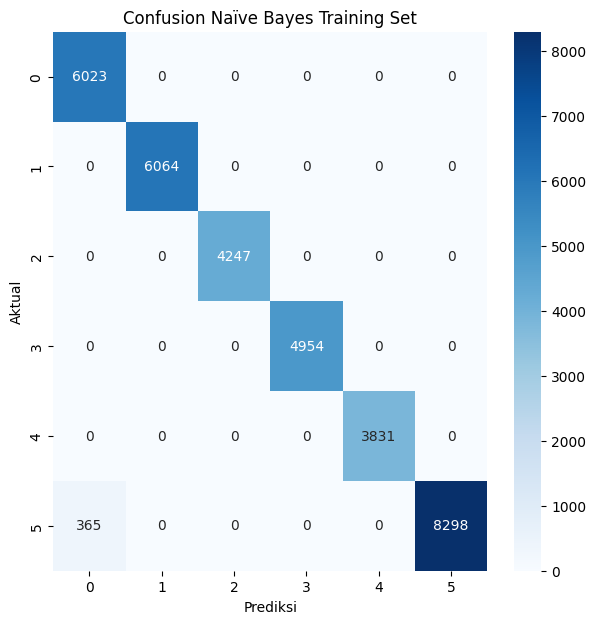

In [9]:
# evaluasi naive bayes pada training set
y_train_pred_NaiveBayes = naiveBayes.predict(X_train)

accuracy_train_Bayes = accuracy_score(y_train, y_train_pred_NaiveBayes)
f1_train_Bayes = f1_score(y_train, y_train_pred_NaiveBayes, average='weighted')
precision_train_Bayes = precision_score(y_train, y_train_pred_NaiveBayes, average='weighted')
recall_train_Bayes = recall_score(y_train, y_train_pred_NaiveBayes, average='weighted')

print(f"Training Accuracy Bayes: {accuracy_train_Bayes:.4f}")
print(f"Training F1-score Bayes: {f1_train_Bayes:.4f}")
print(f"Training Precision Bayes: {precision_train_Bayes:.4f}")
print(f"Training Recall Bayes: {recall_train_Bayes:.4f}")

labels_Unik = sorted(set(y))
confusion_train_Bayes = confusion_matrix(y_train, y_train_pred_NaiveBayes)
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_train_Bayes, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=labels_Unik, yticklabels=labels_Unik)

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Naïve Bayes Training Set')
plt.show()


accuracy bayes: 0.9898
F1-score bayes: 0.9899
precision bayes: 0.9904
recall bayes: 0.9898


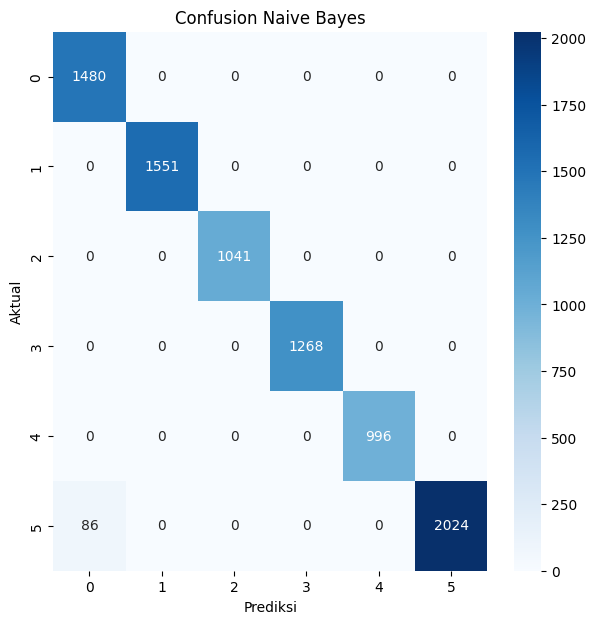

In [10]:
# 1. NaiveBayes pada testing set
y_pred_NaiveBayes = naiveBayes.predict(X_test)

accuracy_Bayes = accuracy_score(y_test, y_pred_NaiveBayes)
f1_Bayes = f1_score(y_test, y_pred_NaiveBayes, average='weighted')
precision_Bayes = precision_score(y_test, y_pred_NaiveBayes, average='weighted')
recall_Bayes = recall_score(y_test, y_pred_NaiveBayes, average='weighted')

print(f"accuracy bayes: {accuracy_Bayes:.4f}")
print(f"F1-score bayes: {f1_Bayes:.4f}")
print(f"precision bayes: {precision_Bayes:.4f}")
print(f"recall bayes: {recall_Bayes:.4f}")

labels_Unik = sorted(set(y))
confussion_Bayes = confusion_matrix(y_test, y_pred_NaiveBayes)
plt.figure(figsize=(7, 7))
sns.heatmap(confussion_Bayes, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=labels_Unik,
            yticklabels=labels_Unik)

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Naive Bayes')
plt.show()

Training Accuracy Random Forest: 1.0000
Training F1-score Random Forest: 1.0000
Training Precision Random Forest: 1.0000
Training Recall Random Forest: 1.0000


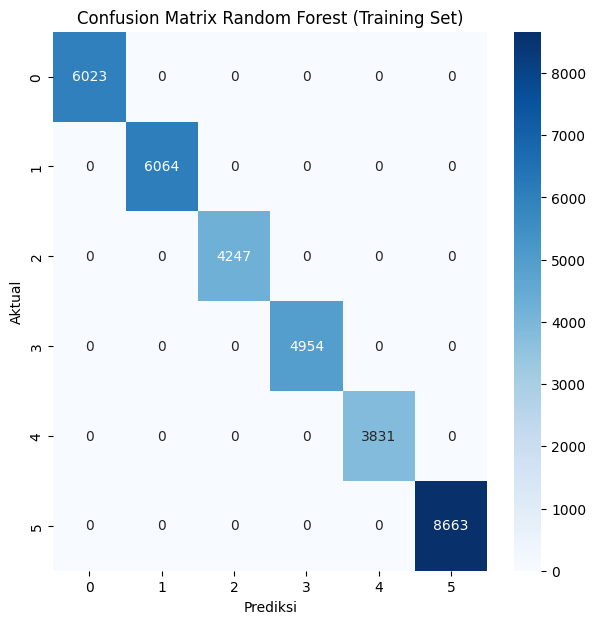

In [11]:
# evaluasi random forest pada training set
y_train_pred_RandomForest = randomForest.predict(X_train)

accuracy_train_RandomForest = accuracy_score(y_train, y_train_pred_RandomForest)
f1_train_RandomForest = f1_score(y_train, y_train_pred_RandomForest, average='weighted')
precision_train_RandomForest = precision_score(y_train, y_train_pred_RandomForest, average='weighted')
recall_train_RandomForest = recall_score(y_train, y_train_pred_RandomForest, average='weighted')

print(f"Training Accuracy Random Forest: {accuracy_train_RandomForest:.4f}")
print(f"Training F1-score Random Forest: {f1_train_RandomForest:.4f}")
print(f"Training Precision Random Forest: {precision_train_RandomForest:.4f}")
print(f"Training Recall Random Forest: {recall_train_RandomForest:.4f}")

confusion_train_RandomForest = confusion_matrix(y_train, y_train_pred_RandomForest)
plt.figure(figsize=(7, 7))
sns.heatmap(confusion_train_RandomForest, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=labels_Unik, yticklabels=labels_Unik)

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Random Forest (Training Set)')
plt.show()


accuracy random forest: 1.0000
F1-score random forest: 1.0000
precision random forest: 1.0000
recall random forest: 1.0000


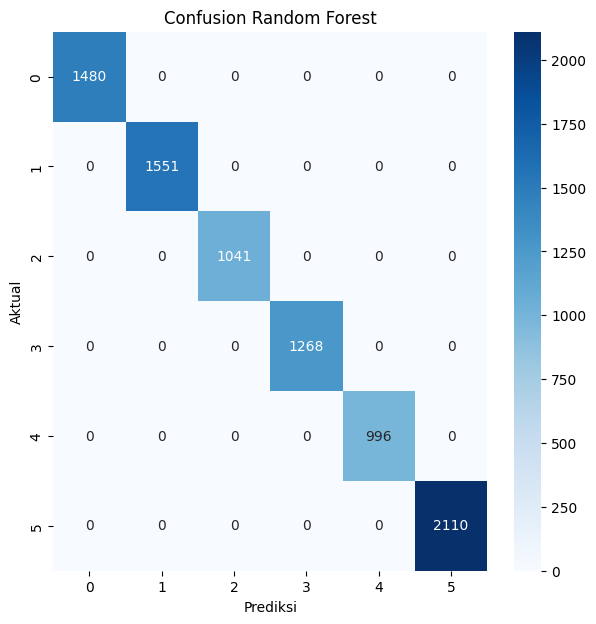

In [12]:
# 2 Random Forest
y_pred_RandomForest = randomForest.predict(X_test)

accuracy_RandomForest = accuracy_score(y_test, y_pred_RandomForest)
f1_RandomForest = f1_score(y_test, y_pred_RandomForest, average='weighted')
precision_RandomForest = precision_score(y_test, y_pred_RandomForest, average='weighted')
recall_RandomForest = recall_score(y_test, y_pred_RandomForest, average='weighted')

print(f"accuracy random forest: {accuracy_RandomForest:.4f}")
print(f"F1-score random forest: {f1_RandomForest:.4f}")
print(f"precision random forest: {precision_RandomForest:.4f}")
print(f"recall random forest: {recall_RandomForest:.4f}")

labels_Unik = sorted(set(y))
confussion_randomForest = confusion_matrix(y_test, y_pred_RandomForest)
plt.figure(figsize=(7, 7))
sns.heatmap(confussion_randomForest, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=labels_Unik,
            yticklabels=labels_Unik)

plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Random Forest')
plt.show()

Hasil evaluasi dari kedua algoritma sebagai berikut:
- Naive bayes menghasilkan akurasi 0.9898, F1 score 0.9899, precision sebesar 0.9904, dan recall 0.9898. Dengan 86 kesalahan yang seharusnya masuk cluster 5 tapi diprediksi sebagai cluster 0.
- Random forest menghasilkan akurasi, F1 score, presisi, dan recall yang semuanya bernilai 1. Tidak terdapat satu pun kesalahan dalam prediksi

In [13]:
metrics = ["Accuracy", "F1-score", "Precision", "Recall"]
Naive_Bayes = [
    accuracy_score(y_test, y_pred_NaiveBayes),
    f1_score(y_test, y_pred_NaiveBayes, average='weighted'),
    precision_score(y_test, y_pred_NaiveBayes, average='weighted'),
    recall_score(y_test, y_pred_NaiveBayes, average='weighted')
]
Random_Forest = [
    accuracy_score(y_test, y_pred_RandomForest),
    f1_score(y_test, y_pred_RandomForest, average='weighted'),
    precision_score(y_test, y_pred_RandomForest, average='weighted'),
    recall_score(y_test, y_pred_RandomForest, average='weighted')
]

df_evaluasi = pd.DataFrame({
    "Metrics": metrics,
    "Naïve Bayes": Naive_Bayes,
    "Random Forest": Random_Forest
})

print(df_evaluasi)

     Metrics  Naïve Bayes  Random Forest
0   Accuracy     0.989818            1.0
1   F1-score     0.989855            1.0
2  Precision     0.990377            1.0
3     Recall     0.989818            1.0


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

## **e. Analisis Hasil Evaluasi Model Klasifikasi**


1. . Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu? Tidak terjadi hal seperti ini pada model yang telah ditraining. Score untuk precision dan recall bagus untuk kedua algoritma. Hanya saja score di naive bayes sedikit lebih rendah dibandingkan random forest.
  - Apakah model mengalami overfitting atau underfitting? Sejauh ini tidak ditemukan adanya overfitting maupun underfitting pada model.
2.  Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
Untuk dataset yang digunakan, entri data sudah lebih dari cukup dan algoritma yang digunakan juga telah memprediksi klasifikasi dengan baik.